In [1]:
import pybaseball as pb

In [2]:
import seaborn as sns
%matplotlib inline

In [3]:
import numpy as np

In [4]:
import pandas as pd

In [5]:
pb.cache.enable()

In [6]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

### player lookup

In [9]:
pb.playerid_lookup("Ohtani", "Shohei")

,name_last,name_first,key_mlbam,key_retro,key_bbref,key_fangraphs,mlb_played_first,mlb_played_last
0,ohtani,shohei,660271,ohtas001,ohtansh01,19755,2018.0,2022.0


### utils

In [7]:
def numeric_cols(df):
    return df.select_dtypes(include=np.number)

In [8]:
def batting(year):
    """
    Get batting stats for the specified year for batters with PA above the season median.
    
    First, get all batting stats with no qualifier (i.e. minimun PA).
    Use the median PA of that data as the qualifier for a follow-up request.
    """
    batting_all_median = pb.batting_stats(year, year, league="all", ind=1, qual=1)["PA"].median()
    return pb.batting_stats(year, year, league="all", ind=1, qual=batting_all_median)    

In [30]:
def pitching(year):
    """
    Get pitching stats for the specified year for pitchers with PA above the season median.
    
    First, get all pitching stats with no qualifier (i.e. minimun PA).
    Use the median PA of that data as the qualifier for a follow-up request.
    """
    pitching_all_median = pb.pitching_stats(year, year, league="all", ind=1, qual=1)["IP"].median()
    return pb.pitching_stats(year, year, league="all", ind=1, qual=pitching_all_median)    

In [10]:
def ohtani(df):
    return df.loc[df["IDfg"] == 19755]

## 2021

In [29]:
batting_2021 = batting(2021)

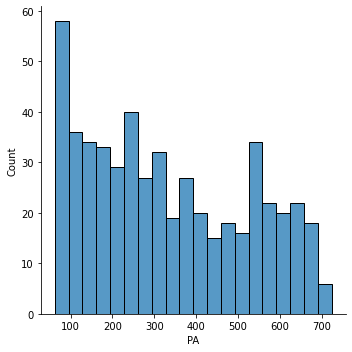

In [22]:
sns.displot(batting2021["PA"], bins=20)

In [21]:
pitching_2021 = pb.pitching_stats(2021, 2021, league="all", ind=1, qual=0)

In [32]:
pitching_2021.head()

,IDfg,Season,Name,Team,Age,W,L,WAR,ERA,G,GS,CG,ShO,SV,BS,IP,TBF,H,R,ER,HR,BB,IBB,HBP,WP,BK,SO,GB,FB,LD,IFFB,Balls,Strikes,Pitches,RS,IFH,BU,BUH,K/9,BB/9,K/BB,H/9,HR/9,AVG,WHIP,BABIP,LOB%,FIP,GB/FB,LD%,GB%,FB%,IFFB%,HR/FB,IFH%,BUH%,Starting,Start-IP,Relieving,Relief-IP,RAR,Dollars,tERA,xFIP,WPA,-WPA,+WPA,RE24,REW,pLI,inLI,gmLI,exLI,Pulls,WPA/LI,Clutch,FB% 2,FBv,SL%,SLv,CT%,CTv,CB%,CBv,CH%,CHv,SF%,SFv,KN%,KNv,XX%,PO%,wFB,wSL,wCT,wCB,wCH,wSF,wKN,wFB/C,wSL/C,wCT/C,wCB/C,wCH/C,wSF/C,wKN/C,O-Swing%,Z-Swing%,Swing%,O-Contact%,Z-Contact%,Contact%,Zone%,F-Strike%,SwStr%,HLD,SD,MD,ERA-,FIP-,xFIP-,K%,BB%,SIERA,RS/9,E-F,FA% (sc),FT% (sc),FC% (sc),FS% (sc),FO% (sc),SI% (sc),SL% (sc),CU% (sc),KC% (sc),EP% (sc),CH% (sc),SC% (sc),KN% (sc),UN% (sc),vFA (sc),vFT (sc),vFC (sc),vFS (sc),vFO (sc),vSI (sc),vSL (sc),vCU (sc),vKC (sc),vEP (sc),vCH (sc),vSC (sc),vKN (sc),FA-X (sc),FT-X (sc),FC-X (sc),FS-X (sc),FO-X (sc),SI-X (sc),SL-X (sc),CU-X (sc),KC-X (sc),EP-X (sc),CH-X (sc),SC-X (sc),KN-X (sc),FA-Z (sc),FT-Z (sc),FC-Z (sc),FS-Z (sc),FO-Z (sc),SI-Z (sc),SL-Z (sc),CU-Z (sc),KC-Z (sc),EP-Z (sc),CH-Z (sc),SC-Z (sc),KN-Z (sc),wFA (sc),wFT (sc),wFC (sc),wFS (sc),wFO (sc),wSI (sc),wSL (sc),wCU (sc),wKC (sc),wEP (sc),wCH (sc),wSC (sc),wKN (sc),wFA/C (sc),wFT/C (sc),wFC/C (sc),wFS/C (sc),wFO/C (sc),wSI/C (sc),wSL/C (sc),wCU/C (sc),wKC/C (sc),wEP/C (sc),wCH/C (sc),wSC/C (sc),wKN/C (sc),O-Swing% (sc),Z-Swing% (sc),Swing% (sc),O-Contact% (sc),Z-Contact% (sc),Contact% (sc),Zone% (sc),Pace,RA9-WAR,BIP-Wins,LOB-Wins,FDP-Wins,Age Rng,K-BB%,Pull%,Cent%,Oppo%,Soft%,Med%,Hard%,kwERA,TTO%,CH% (pi),CS% (pi),CU% (pi),FA% (pi),FC% (pi),FS% (pi),KN% (pi),SB% (pi),SI% (pi),SL% (pi),XX% (pi),vCH (pi),vCS (pi),vCU (pi),vFA (pi),vFC (pi),vFS (pi),vKN (pi),vSB (pi),vSI (pi),vSL (pi),vXX (pi),CH-X (pi),CS-X (pi),CU-X (pi),FA-X (pi),FC-X (pi),FS-X (pi),KN-X (pi),SB-X (pi),SI-X (pi),SL-X (pi),XX-X (pi),CH-Z (pi),CS-Z (pi),CU-Z (pi),FA-Z (pi),FC-Z (pi),FS-Z (pi),KN-Z (pi),SB-Z (pi),SI-Z (pi),SL-Z (pi),XX-Z (pi),wCH (pi),wCS (pi),wCU (pi),wFA (pi),wFC (pi),wFS (pi),wKN (pi),wSB (pi),wSI (pi),wSL (pi),wXX (pi),wCH/C (pi),wCS/C (pi),wCU/C (pi),wFA/C (pi),wFC/C (pi),wFS/C (pi),wKN/C (pi),wSB/C (pi),wSI/C (pi),wSL/C (pi),wXX/C (pi),O-Swing% (pi),Z-Swing% (pi),Swing% (pi),O-Contact% (pi),Z-Contact% (pi),Contact% (pi),Zone% (pi),Pace (pi),FRM,K/9+,BB/9+,K/BB+,H/9+,HR/9+,AVG+,WHIP+,BABIP+,LOB%+,K%+,BB%+,LD%+,GB%+,FB%+,HR/FB%+,Pull%+,Cent%+,Oppo%+,Soft%+,Med%+,Hard%+,EV,LA,Barrels,Barrel%,maxEV,HardHit,HardHit%,Events,CStr%,CSW%,xERA
124,19361,2021,Corbin Burnes,MIL,26,11,5,7.5,2.43,28,28,0,0,0,0,167.0,657,123,47,45,7,34,0,6,5,0,234,185,115,79,9,872,1722,2594,85,17,4,1,12.61,1.83,6.88,6.63,0.38,0.199,0.94,0.309,0.757,1.63,1.61,0.208,0.488,0.303,0.078,0.061,0.092,0.25,65.4,167.0,NaN,NaN,65.4,$59.8,1.96,2.30,3.31,-9.18,12.49,34.93,3.55,1.00,0.97,0.87,1.37,28,4.44,-1.13,0.108,96.9,0.090,88.1,0.522,95.3,0.184,81.3,0.098,90.7,NaN,NaN,NaN,NaN,NaN,NaN,-2.4,7.0,24.2,13.3,0.7,NaN,NaN,-0.85,2.99,1.79,2.79,0.27,NaN,NaN,0.378,0.655,0.485,0.489,0.811,0.658,0.389,0.624,0.166,0,0,0,57,38,54,0.356,0.052,2.61,4.58,0.79,0.015,NaN,0.523,NaN,NaN,0.091,0.092,0.183,NaN,NaN,0.096,NaN,NaN,NaN,96.4,NaN,95.2,NaN,NaN,96.9,88.0,81.2,NaN,NaN,90.7,NaN,NaN,-3.4,NaN,2.1,NaN,NaN,-6.9,3.9,6.3,NaN,NaN,-8.0,NaN,NaN,8.2,NaN,6.7,NaN,NaN,7.3,0.3,-4.2,NaN,NaN,4.7,NaN,NaN,-2.3,NaN,26.2,NaN,NaN,-0.4,7.1,14.1,NaN,NaN,0.6,NaN,NaN,-5.68,NaN,1.93,NaN,NaN,-0.16,2.98,2.98,NaN,NaN,0.25,NaN,NaN,0.329,0.645,0.485,0.374,0.806,0.658,0.495,26.2,6.3,-0.7,-0.5,-1.2,26 - 26,0.304,0.402,0.360,0.238,0.204,0.548,0.248,2.50,0.419,0.096,NaN,0.183,0.014,0.521,NaN,NaN,NaN,0.096,0.090,NaN,90.6,NaN,81.2,96.5,95.1,NaN,NaN,NaN,96.8,87.9,NaN,-8.1,NaN,6.4,-2.8,2.4,NaN,NaN,NaN,-6.8,4.4,NaN,3.2,NaN,-5.8,7.9,5.5,NaN,NaN,NaN,6.0,-1.2,NaN,0.6,NaN,14.1,0.5,26.1,NaN,NaN,NaN,-2.7,6.9,NaN,0.25,NaN,2.97,1.37,1.93,NaN,NaN,NaN,-1.10,2.96,NaN,0.332,0.643,0.485,0.393,0.799,0.658,0.492,26.2,1.4,141.0,54.0,262.0,81.0,31.0,84,73.0,107.0,105.0,153,58,100.0,112.0,85.0,44.0,1

In [28]:
batting_2021_war = batting_2021[["IDfg", "Name", "Team", "WAR"]]

NameError: name 'batting_2021' is not defined

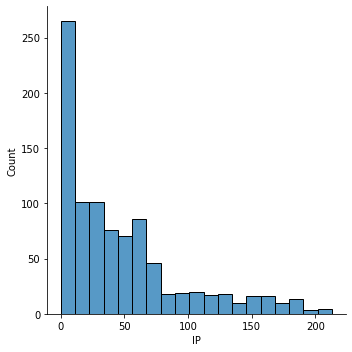

In [23]:
sns.displot(pitching_2021["IP"])

In [25]:
pitching_2021_war = pitching_2021[["IDfg", "Name", "Team", "WAR"]]

In [27]:
pitching_2021_war.head()

,IDfg,Name,Team,WAR
124,19361,Corbin Burnes,MIL,7.5
163,10310,Zack Wheeler,PHI,7.3
341,9132,Nathan Eovaldi,BOS,5.6
131,19374,Walker Buehler,LAD,5.5
130,3137,Max Scherzer,- - -,5.4


In [50]:
ohtani_batting_2021 = ohtani(batting_2021)

In [51]:
ohtani_batting_2021_war

,IDfg,Season,Name,Team,Age,G,AB,PA,H,1B,2B,3B,HR,R,RBI,BB,IBB,SO,HBP,SF,SH,GDP,SB,CS,AVG,GB,FB,LD,IFFB,Pitches,Balls,Strikes,IFH,BU,BUH,BB%,K%,BB/K,OBP,SLG,OPS,ISO,BABIP,GB/FB,LD%,GB%,FB%,IFFB%,HR/FB,IFH%,BUH%,wOBA,wRAA,wRC,Bat,Fld,Rep,Pos,RAR,WAR,Dol,Spd,wRC+,WPA,-WPA,+WPA,RE24,REW,pLI,phLI,PH,WPA/LI,Clutch,FB% (Pitch),FBv,SL%,SLv,CT%,CTv,CB%,CBv,CH%,CHv,SF%,SFv,KN%,KNv,XX%,PO%,wFB,wSL,wCT,wCB,wCH,wSF,wKN,wFB/C,wSL/C,wCT/C,wCB/C,wCH/C,wSF/C,wKN/C,O-Swing%,Z-Swing%,Swing%,O-Contact%,Z-Contact%,Contact%,Zone%,F-Strike%,SwStr%,BsR,FA% (sc),FT% (sc),FC% (sc),FS% (sc),FO% (sc),SI% (sc),SL% (sc),CU% (sc),KC% (sc),EP% (sc),CH% (sc),SC% (sc),KN% (sc),UN% (sc),vFA (sc),vFT (sc),vFC (sc),vFS (sc),vFO (sc),vSI (sc),vSL (sc),vCU (sc),vKC (sc),vEP (sc),vCH (sc),vSC (sc),vKN (sc),FA-X (sc),FT-X (sc),FC-X (sc),FS-X (sc),FO-X (sc),SI-X (sc),SL-X (sc),CU-X (sc),KC-X (sc),EP-X (sc),CH-X (sc),SC-X (sc),KN-X (sc),FA-Z (sc),FT-Z (sc),FC-Z (sc),FS-Z (sc),FO-Z (sc),SI-Z (sc),SL-Z (sc),CU-Z (sc),KC-Z (sc),EP-Z (sc),CH-Z (sc),SC-Z (sc),KN-Z (sc),wFA (sc),wFT (sc),wFC (sc),wFS (sc),wFO (sc),wSI (sc),wSL (sc),wCU (sc),wKC (sc),wEP (sc),wCH (sc),wSC (sc),wKN (sc),wFA/C (sc),wFT/C (sc),wFC/C (sc),wFS/C (sc),wFO/C (sc),wSI/C (sc),wSL/C (sc),wCU/C (sc),wKC/C (sc),wEP/C (sc),wCH/C (sc),wSC/C (sc),wKN/C (sc),O-Swing% (sc),Z-Swing% (sc),Swing% (sc),O-Contact% (sc),Z-Contact% (sc),Contact% (sc),Zone% (sc),Pace,Def,wSB,UBR,Age Rng,Off,Lg,wGDP,Pull%,Cent%,Oppo%,Soft%,Med%,Hard%,TTO%,CH% (pi),CS% (pi),CU% (pi),FA% (pi),FC% (pi),FS% (pi),KN% (pi),SB% (pi),SI% (pi),SL% (pi),XX% (pi),vCH (pi),vCS (pi),vCU (pi),vFA (pi),vFC (pi),vFS (pi),vKN (pi),vSB (pi),vSI (pi),vSL (pi),vXX (pi),CH-X (pi),CS-X (pi),CU-X (pi),FA-X (pi),FC-X (pi),FS-X (pi),KN-X (pi),SB-X (pi),SI-X (pi),SL-X (pi),XX-X (pi),CH-Z (pi),CS-Z (pi),CU-Z (pi),FA-Z (pi),FC-Z (pi),FS-Z (pi),KN-Z (pi),SB-Z (pi),SI-Z (pi),SL-Z (pi),XX-Z (pi),wCH (pi),wCS (pi),wCU (pi),wFA (pi),wFC (pi),wFS (pi),wKN (pi),wSB (pi),wSI (pi),wSL (pi),wXX (pi),wCH/C (pi),wCS/C (pi),wCU/C (pi),wFA/C (pi),wFC/C (pi),wFS/C (pi),wKN/C (pi),wSB/C (pi),wSI/C (pi),wSL/C (pi),wXX/C (pi),O-Swing% (pi),Z-Swing% (pi),Swing% (pi),O-Contact% (pi),Z-Contact% (pi),Contact% (pi),Zone% (pi),Pace (pi),FRM,AVG+,BB%+,K%+,OBP+,SLG+,ISO+,BABIP+,LD+%,GB%+,FB%+,HR/FB%+,Pull%+,Cent%+,Oppo%+,Soft%+,Med%+,Hard%+,EV,LA,Barrels,Barrel%,maxEV,HardHit,HardHit%,Events,CStr%,CSW%,xBA,xSLG,xwOBA
12,19755,2021,Shohei Ohtani,LAA,26,158,537,639,138,58,26,8,46,103,100,96,20,189,4,2,0,7,26,10,0.257,131,140,74,7,2594,1032,1562,17,5,4,0.15,0.296,0.51,0.372,0.592,0.965,0.335,0.303,0.0094,0.214,0.38,0.406,0.05,0.329,0.13,0.8,0.393,41.8,119,40.4,0.1,20.0,-13.7,51.1,5.1,$41.0,6.9,152,5.18,-8.97,14.15,53.57,5.32,0.89,1.86,9,4.76,1.08,0.44,93.8,0.19,83.8,0.055,88.6,0.126,80.1,0.166,85.0,0.024,86.2,NaN,NaN,0.025,NaN,17.7,16.1,1.6,0.9,8.5,1.4,NaN,1.55,3.26,1.11,0.27,1.96,2.33,NaN,0.301,0.72,0.458,0.528,0.773,0.672,0.374,0.571,0.15,2.5,0.302,NaN,0.055,0.025,NaN,0.137,0.185,0.098,0.034,NaN,0.164,NaN,NaN,NaN,94.0,NaN,88.7,85.8,NaN,93.0,84.0,79.3,82.2,NaN,85.0,NaN,NaN,-1.7,NaN,0.6,-7.2,NaN,0.1,-0.1,0.9,4.4,NaN,-6.3,NaN,NaN,9.7,NaN,4.7,2.5,NaN,5.7,1.1,-5.5,-6.2,NaN,4.3,NaN,NaN,8.4,NaN,2.5,-0.2,NaN,9.5,9.5,3.4,-0.1,NaN,9.2,NaN,NaN,1.08,NaN,1.73,-0.33,NaN,2.69,1.99,1.36,-0.15,NaN,2.17,NaN,NaN,0.268,0.676,0.457,0.465,0.763,0.669,0.464,23.2,-13.6,0.5,0.4,26 - 26,42.9,1.7,1.6,0.48,0.3,0.22,0.109,0.44,0.451,0.518,0.164,NaN,0.126,0.315,0.058,0.024,NaN,0.0,0.126,0.186,NaN,85.1,NaN,80.2,94.0,88.6,85.8,NaN,77.0,93.4,83.8,NaN,-6.2,NaN,2.2,-1.4,0.7,-6.6,NaN,9.8,-0.4,-0.3,NaN,2.8,NaN,-7.6,8.5,3.4,0.8,NaN,-2.1,4.2,-0.3,NaN,10.0,NaN,2.1,8.3,4.0,-0.7,NaN,0.0,7.2,11.3,NaN,2.35,NaN,0.63,1.02,2.65,-1.09,NaN,2.85,2.21,2.35,NaN,0.273,0.67,0.458,0.469,0.763,0.669,0.465,23.2,NaN,104,177,129,118,142,197,104,1.05,89,110,241,119,86,88,66,85,140,93.6,16.8,78,0.223,119.0,187,0.534,350,0.144,0.294,0.269,0.616,0.411


In [52]:
ohtani_pitching_2021 = ohtani(pitching_2021)

In [53]:
ohtani_pitching_2021

,IDfg,Season,Name,Team,Age,G,AB,PA,H,1B,2B,3B,HR,R,RBI,BB,IBB,SO,HBP,SF,SH,GDP,SB,CS,AVG,GB,FB,LD,IFFB,Pitches,Balls,Strikes,IFH,BU,BUH,BB%,K%,BB/K,OBP,SLG,OPS,ISO,BABIP,GB/FB,LD%,GB%,FB%,IFFB%,HR/FB,IFH%,BUH%,wOBA,wRAA,wRC,Bat,Fld,Rep,Pos,RAR,WAR,Dol,Spd,wRC+,WPA,-WPA,+WPA,RE24,REW,pLI,phLI,PH,WPA/LI,Clutch,FB% (Pitch),FBv,SL%,SLv,CT%,CTv,CB%,CBv,CH%,CHv,SF%,SFv,KN%,KNv,XX%,PO%,wFB,wSL,wCT,wCB,wCH,wSF,wKN,wFB/C,wSL/C,wCT/C,wCB/C,wCH/C,wSF/C,wKN/C,O-Swing%,Z-Swing%,Swing%,O-Contact%,Z-Contact%,Contact%,Zone%,F-Strike%,SwStr%,BsR,FA% (sc),FT% (sc),FC% (sc),FS% (sc),FO% (sc),SI% (sc),SL% (sc),CU% (sc),KC% (sc),EP% (sc),CH% (sc),SC% (sc),KN% (sc),UN% (sc),vFA (sc),vFT (sc),vFC (sc),vFS (sc),vFO (sc),vSI (sc),vSL (sc),vCU (sc),vKC (sc),vEP (sc),vCH (sc),vSC (sc),vKN (sc),FA-X (sc),FT-X (sc),FC-X (sc),FS-X (sc),FO-X (sc),SI-X (sc),SL-X (sc),CU-X (sc),KC-X (sc),EP-X (sc),CH-X (sc),SC-X (sc),KN-X (sc),FA-Z (sc),FT-Z (sc),FC-Z (sc),FS-Z (sc),FO-Z (sc),SI-Z (sc),SL-Z (sc),CU-Z (sc),KC-Z (sc),EP-Z (sc),CH-Z (sc),SC-Z (sc),KN-Z (sc),wFA (sc),wFT (sc),wFC (sc),wFS (sc),wFO (sc),wSI (sc),wSL (sc),wCU (sc),wKC (sc),wEP (sc),wCH (sc),wSC (sc),wKN (sc),wFA/C (sc),wFT/C (sc),wFC/C (sc),wFS/C (sc),wFO/C (sc),wSI/C (sc),wSL/C (sc),wCU/C (sc),wKC/C (sc),wEP/C (sc),wCH/C (sc),wSC/C (sc),wKN/C (sc),O-Swing% (sc),Z-Swing% (sc),Swing% (sc),O-Contact% (sc),Z-Contact% (sc),Contact% (sc),Zone% (sc),Pace,Def,wSB,UBR,Age Rng,Off,Lg,wGDP,Pull%,Cent%,Oppo%,Soft%,Med%,Hard%,TTO%,CH% (pi),CS% (pi),CU% (pi),FA% (pi),FC% (pi),FS% (pi),KN% (pi),SB% (pi),SI% (pi),SL% (pi),XX% (pi),vCH (pi),vCS (pi),vCU (pi),vFA (pi),vFC (pi),vFS (pi),vKN (pi),vSB (pi),vSI (pi),vSL (pi),vXX (pi),CH-X (pi),CS-X (pi),CU-X (pi),FA-X (pi),FC-X (pi),FS-X (pi),KN-X (pi),SB-X (pi),SI-X (pi),SL-X (pi),XX-X (pi),CH-Z (pi),CS-Z (pi),CU-Z (pi),FA-Z (pi),FC-Z (pi),FS-Z (pi),KN-Z (pi),SB-Z (pi),SI-Z (pi),SL-Z (pi),XX-Z (pi),wCH (pi),wCS (pi),wCU (pi),wFA (pi),wFC (pi),wFS (pi),wKN (pi),wSB (pi),wSI (pi),wSL (pi),wXX (pi),wCH/C (pi),wCS/C (pi),wCU/C (pi),wFA/C (pi),wFC/C (pi),wFS/C (pi),wKN/C (pi),wSB/C (pi),wSI/C (pi),wSL/C (pi),wXX/C (pi),O-Swing% (pi),Z-Swing% (pi),Swing% (pi),O-Contact% (pi),Z-Contact% (pi),Contact% (pi),Zone% (pi),Pace (pi),FRM,AVG+,BB%+,K%+,OBP+,SLG+,ISO+,BABIP+,LD+%,GB%+,FB%+,HR/FB%+,Pull%+,Cent%+,Oppo%+,Soft%+,Med%+,Hard%+,EV,LA,Barrels,Barrel%,maxEV,HardHit,HardHit%,Events,CStr%,CSW%,xBA,xSLG,xwOBA
49,19755,2021,Shohei Ohtani,LAA,26,158,537,639,138,58,26,8,46,103,100,96,20,189,4,2,0,7,26,10,0.257,131,140,74,7,2594,1032,1562,17,5,4,0.15,0.296,0.51,0.372,0.592,0.965,0.335,0.303,0.0094,0.214,0.38,0.406,0.05,0.329,0.13,0.8,0.393,41.8,119,40.4,0.1,20.0,-13.7,51.1,5.1,$41.0,6.9,152,5.18,-8.97,14.15,53.57,5.32,0.89,1.86,9,4.76,1.08,0.44,93.8,0.19,83.8,0.055,88.6,0.126,80.1,0.166,85.0,0.024,86.2,NaN,NaN,0.025,NaN,17.7,16.1,1.6,0.9,8.5,1.4,NaN,1.55,3.26,1.11,0.27,1.96,2.33,NaN,0.301,0.72,0.458,0.528,0.773,0.672,0.374,0.571,0.15,2.5,0.302,NaN,0.055,0.025,NaN,0.137,0.185,0.098,0.034,NaN,0.164,NaN,NaN,NaN,94.0,NaN,88.7,85.8,NaN,93.0,84.0,79.3,82.2,NaN,85.0,NaN,NaN,-1.7,NaN,0.6,-7.2,NaN,0.1,-0.1,0.9,4.4,NaN,-6.3,NaN,NaN,9.7,NaN,4.7,2.5,NaN,5.7,1.1,-5.5,-6.2,NaN,4.3,NaN,NaN,8.4,NaN,2.5,-0.2,NaN,9.5,9.5,3.4,-0.1,NaN,9.2,NaN,NaN,1.08,NaN,1.73,-0.33,NaN,2.69,1.99,1.36,-0.15,NaN,2.17,NaN,NaN,0.268,0.676,0.457,0.465,0.763,0.669,0.464,23.2,-13.6,0.5,0.4,26 - 26,42.9,1.7,1.6,0.48,0.3,0.22,0.109,0.44,0.451,0.518,0.164,NaN,0.126,0.315,0.058,0.024,NaN,0.0,0.126,0.186,NaN,85.1,NaN,80.2,94.0,88.6,85.8,NaN,77.0,93.4,83.8,NaN,-6.2,NaN,2.2,-1.4,0.7,-6.6,NaN,9.8,-0.4,-0.3,NaN,2.8,NaN,-7.6,8.5,3.4,0.8,NaN,-2.1,4.2,-0.3,NaN,10.0,NaN,2.1,8.3,4.0,-0.7,NaN,0.0,7.2,11.3,NaN,2.35,NaN,0.63,1.02,2.65,-1.09,NaN,2.85,2.21,2.35,NaN,0.273,0.67,0.458,0.469,0.763,0.669,0.465,23.2,NaN,104.0,177,129,118.0,142.0,197.0,104.0,1.05,89.0,110.0,241.0,119.0,86.0,88.0,66.0,85.0,140.0,93.6,16.8,78,0.223,119.0,187,0.534,350,0.144,0.294,0.269,0.616,0.411


In [36]:
teams = batting_war["Team"].unique()

In [38]:
braves_war = batting_war[batting_war["Team"] == "ATL"]

In [39]:
braves_war

,IDfg,Name,Team,WAR
27,5361,Freddie Freeman,ATL,4.9
26,18360,Austin Riley,ATL,4.7
5,18401,Ronald Acuna Jr.,ATL,4.3
119,16556,Ozzie Albies,ATL,3.9
184,18314,Dansby Swanson,ATL,3.4
327,18721,Guillermo Heredia,ATL,1.0
344,13743,Max Fried,ATL,0.8
331,7739,Travis d'Arnaud,ATL,0.6
211,8418,Ehire Adrianza,ATL,0.5
192,5486,Abraham Almonte,ATL,0.0


In [15]:
batting_cols = ["SO", "HR", "RBI", "SB", "AVG", "OBP", "SLG", "OPS", "wOBA", "K%", "xBA", "xSLG", "xwOBA", "HardHit%", "Barrel%", "BsR", "WPA"]

In [ ]:
pitching_cols = []

In [131]:
ohtani_diff = numeric_cols(batting2022) - numeric_cols(ohtani_batting).iloc[0]

In [132]:
ohtani_diff["IDfg"] = batting2022["IDfg"]

In [133]:
ohtani_diff

,IDfg,G,AB,PA,H,1B,2B,3B,HR,R,...,Barrel%,maxEV,HardHit,HardHit%,Events,CStr%,CSW%,xBA,xSLG,xwOBA
8,15640,0.0,1.0,14.0,21.0,2.0,2.0,-3.0,20.0,33.0,...,0.099,-0.7,35.0,0.131,-8.0,0.037,0.023,0.033,0.160,0.077
18,9777,-5.0,-14.0,-30.0,15.0,7.0,11.0,-2.0,-1.0,-5.0,...,-0.077,-7.7,-7.0,-0.073,38.0,0.023,-0.014,-0.009,-0.109,-0.046
10,9218,-3.0,-8.0,-9.0,29.0,16.0,14.0,-3.0,2.0,16.0,...,-0.045,-6.8,-2.0,-0.014,5.0,0.054,0.026,-0.006,-0.057,-0.014
25,11493,-5.0,-8.0,-23.0,16.0,12.0,11.0,-2.0,-5.0,12.0,...,-0.073,-6.7,11.0,0.018,11.0,-0.011,-0.027,-0.006,-0.111,-0.046
20,5361,2.0,23.0,27.0,36.0,28.0,20.0,-1.0,-11.0,16.0,...,-0.067,-6.8,27.0,-0.006,61.0,-0.020,-0.062,0.045,-0.010,0.021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,11737,2.0,22.0,-9.0,7.0,21.0,5.0,-3.0,-16.0,-17.0,...,-0.100,-9.0,-31.0,-0.126,21.0,-0.033,0.016,-0.022,-0.164,-0.082
468,12775,-41.0,-214.0,-263.0,-65.0,-28.0,-15.0,-3.0,-19.0,-45.0,...,-0.087,-8.4,-92.0,-0.089,-169.0,0.007,0.052,-0.074,-0.221,-0.129
527,27459,-60.0,-241.0,-281.0,-75.0,-35.0,-13.0,-3.0,-24.0,-52.0,...,-0.112,-11.7,-100.0,-0.119,-180.0,0.040,0.000,-0.073,-0.271,-0.130
464,10071,-51.0,-209.0,-254.0,-62.0,-27.0,-11.0,-1.0,-23.0,-38.0,...,-0.141,-9.6,-86.0,-0.077,-158.0,-0.027,0.001,-0.062,-0.273,-0.138
